# Import Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.dpi'] = 150
#plt.rcParams['figure.figsize'] = (10,5)
#import warnings
#warnings.filterwarnings('ignore')
#%matplotlib inline

In [2]:
df = pd.read_csv("/content/NewspaperData.csv")
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
# select required columns only
df = df[['daily','sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 676.0 bytes


# Correlation Analysis

<Axes: xlabel='daily', ylabel='sunday'>

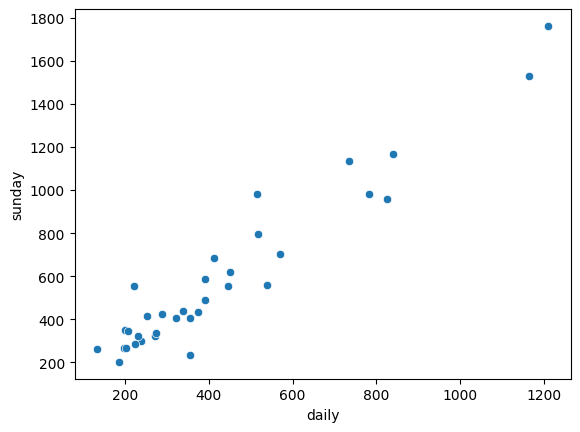

In [5]:
sns.scatterplot(x = df['daily'], y = df['sunday'])

In [6]:
df.corr() # check daily vs sunday

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

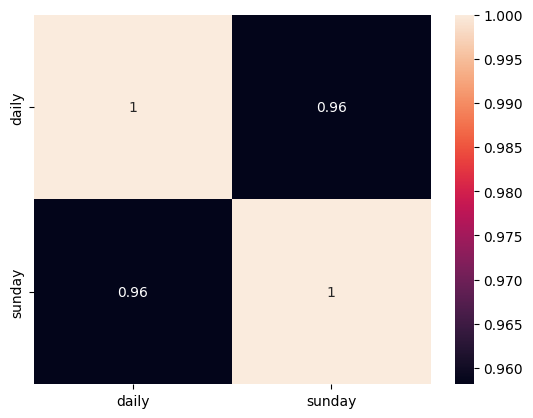

In [8]:
sns.heatmap(df.corr(),annot=True)

Fitting a Linear Regression Model

In [9]:
# statsmodels library is used for multiple purposes like statistical calculations, hypothesis testing, linear regression model building, etc
import statsmodels.formula.api as smf # model - Regression model, "Y~X", OR "Dependent_variable~Independent_Variable"
model = smf.ols("sunday~daily",data = df).fit() # Ordinary Least Squares, y Dep. variable - sunday, then give ~ symbol and then x Ind.Variable - daily,
                                                  # dataset - data, fit() - fit the regression line

In [10]:
#Coefficients are c or B0 and m or B1
model.params
# Reg. Equn: Sunday = B0+B1*daily
# In output: Intercept(i.e. best fit line is intersecting y axis at 13.83) - B0, daily - coefficient of daily i.e.B1
# m=1.33
# c=13.83
# Sunday = 13.83 + 1.33 * daily
# we assumed daily circulation as 200
# So Sunday = 13.83 + 1.33 * 200

,0
Intercept,13.835630
daily,1.339715


In [11]:
sun=13.83+1.33*200
sun

279.83

In [12]:
#R squared values - 0.92 - Good reg. equn.
model.rsquared

np.float64(0.9180596895873295)

<Axes: xlabel='daily', ylabel='sunday'>

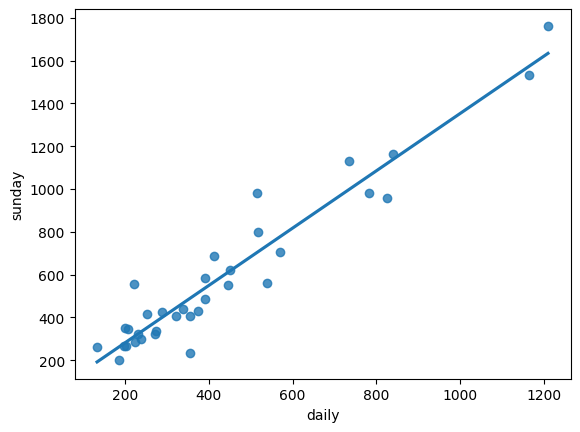

In [13]:
sns.regplot(x="daily", y="sunday", data=df,ci=None)
# if ci=None is not written it will show shaded part around the line.
# It is the size of the confidence interval for the regression estimate.
# This will be drawn using translucent bands around the regression line.

# Predict for new data point

In [14]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300]) # x value is (daily circulation) 200 at one branch and 300 at another branch

In [16]:
newdata

,0
0,200
1,300


In [17]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [19]:
data_pred

,daily
0,200
1,300


In [20]:
model.predict(data_pred) # model - regression model

,0
0,281.778581
1,415.750057


In [21]:
# OR Create a dataframe using dictionary
data_pred2=pd.DataFrame({'daily':[120,250,720,450,640,900]})
data_pred2

,daily
0,120
1,250
2,720
3,450
4,640
5,900


In [22]:
model.predict(data_pred2)

,0
0,174.601401
1,348.764319
2,978.430255
3,616.707271
4,871.253075
5,1219.578912


# **Data Transformation**

1.   Sqrt
2.   Log



**1. Log Transformation**

In [23]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [24]:
# To overcome the effect of outliers perform transformations. Skewed Histogram will become approximately equal to normal
# Log of every column can be taken. It doesn't change the pattern/information in data but changes values to different scales.
df['log_daily'] = np.log(df['daily'])
df

,daily,sunday,log_daily
0,391.952,488.506,5.971139
1,516.981,798.298,6.248006
2,355.628,235.084,5.873885
3,238.555,299.451,5.474600
4,537.780,559.093,6.287450
5,733.775,1133.249,6.598202
6,198.832,348.744,5.292460
7,252.624,417.779,5.531902
8,206.204,344.522,5.328866
9,231.177,323.084,5.443184


In [25]:
df['log_sunday'] = np.log(df['sunday'])
df

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


/tmp/ipython-input-26-790675926.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])
/tmp/ipython-input-26-790675926.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])
/tmp/ipython-input-26-790675926.py:8: UserWarning: 

`distplot` is a deprecated function and will be 

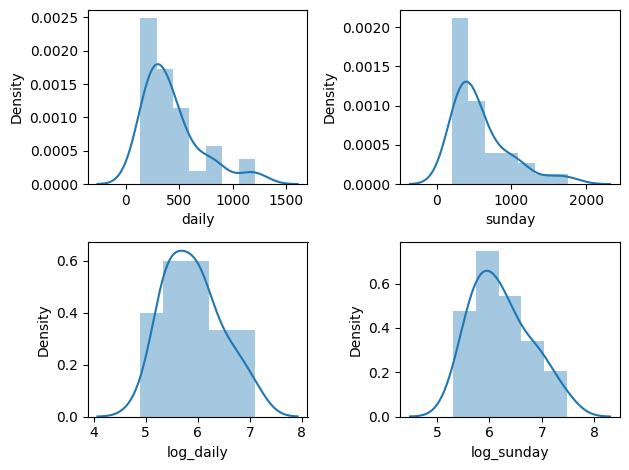

In [26]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['log_daily'])

plt.subplot(2,2,4)
sns.distplot(df['log_sunday'])

plt.tight_layout()
# as compared to previous graphs, skewness is reduced.

In [ ]:
df['log_daily'].skew(), df['log_sunday'].skew() # moderate skewness is there
# To remove all skewness we have to remove all outliers from data

(np.float64(0.4682202000020356), np.float64(0.5337572087816101))

In [ ]:
df['daily'].skew(), df['sunday'].skew() # High skewness.

(np.float64(1.5321591323040094), np.float64(1.5644730738925112))

# **2. Sqrt Transformation**
comparatively less effective than log transformation

In [27]:
df['sqrt_daily'] = np.sqrt(df['daily'])
df['sqrt_sunday'] = np.sqrt(df['sunday'])
df

,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,23.190084,23.645147
5,733.775,1133.249,6.598202,7.032844,27.088282,33.663764
6,198.832,348.744,5.292460,5.854338,14.100780,18.674689
7,252.624,417.779,5.531902,6.034953,15.894150,20.439643
8,206.204,344.522,5.328866,5.842158,14.359805,18.561304
9,231.177,323.084,5.443184,5.777912,15.204506,17.974538


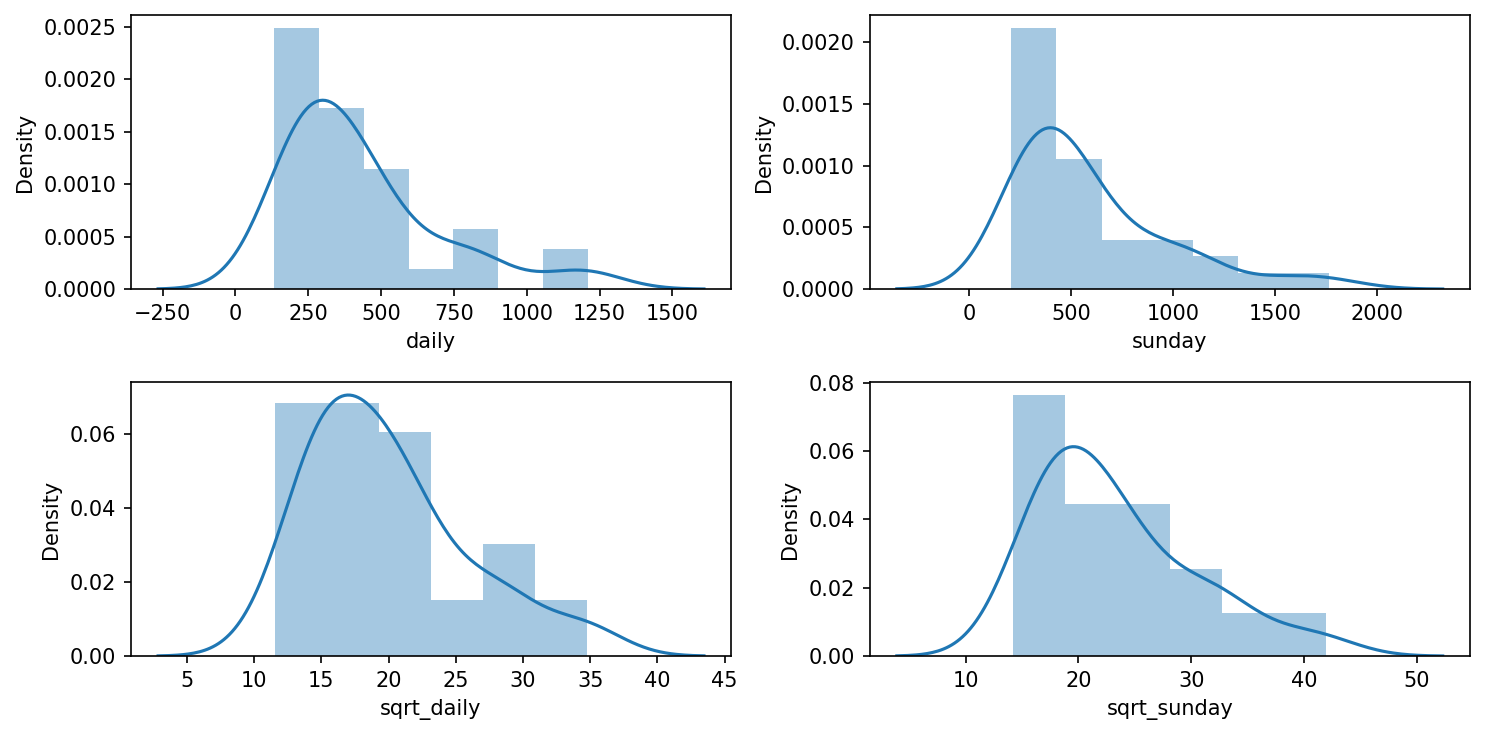

In [ ]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['sqrt_daily'])

plt.subplot(2,2,4)
sns.distplot(df['sqrt_sunday'])

plt.tight_layout()

In [ ]:
df['sqrt_daily'].skew(), df['sqrt_sunday'].skew()

(1.0075247084922163, 1.0392935145699538)

In [1]:

import pandas as pd
df = pd.read_csv("experience_vs_salary.csv")


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the independent (X) and dependent (y) variables
X = df[["Experience (Years)"]]  # Independent variable (Years of Experience)
y = df["Salary ($)"]  # Dependent variable (Salary)

# Creating and fitting the linear regression model
# Use this model when you want go for prediction only.
# Use ols() method when you need detailed statistical analysis of the model.
# eg. to calculate pvalue, tvalue, residuals, rsquared values, fitted values, etc.
model = LinearRegression()
model.fit(X, y)

# Making predictions using the same dataset (without data partitioning)
y_pred = model.predict(X)

# Calculating R-squared (R²) and Mean Squared Error (MSE)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

r2, mse


(0.9789777121563664, 9060606.06060606)